Copied from https://www.kaggle.com/rochellesilva/simple-tutorial-for-beginners

Simple tutorial for data pre-processing, exploratory data analisis and classification.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("../input/train.csv")

dataset.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Percentage of Class 1 that survived: 63.0 %
Percentage of Class 2 that survived: 47.0 %
Percentage of Class 3 that survived: 24.0 %


,1,2,3
Survived,136,87,119
Died,80,97,372


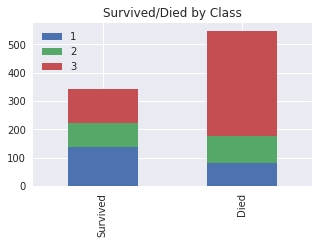

In [3]:
%matplotlib inline
import seaborn
seaborn.set() 

#-------------------Survived/Died by Class -------------------------------------
survived_class = dataset[dataset['Survived']==1]['Pclass'].value_counts()
dead_class = dataset[dataset['Survived']==0]['Pclass'].value_counts()
df_class = pd.DataFrame([survived_class,dead_class])
df_class.index = ['Survived','Died']
df_class.plot(kind='bar',stacked=True, figsize=(5,3), title="Survived/Died by Class")

Class1_survived= df_class.iloc[0,0]/df_class.iloc[:,0].sum()*100
Class2_survived = df_class.iloc[0,1]/df_class.iloc[:,1].sum()*100
Class3_survived = df_class.iloc[0,2]/df_class.iloc[:,2].sum()*100
print("Percentage of Class 1 that survived:" ,round(Class1_survived),"%")
print("Percentage of Class 2 that survived:" ,round(Class2_survived), "%")
print("Percentage of Class 3 that survived:" ,round(Class3_survived), "%")

# display table
from IPython.display import display
display(df_class)

Percentage of female that survived: 74.0 %
Percentage of male that survived: 19.0 %


,female,male
Survived,233,109
Died,81,468


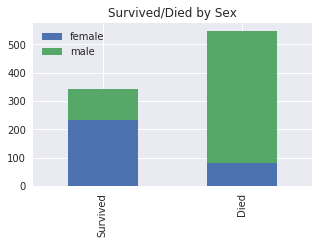

In [4]:


#-------------------Survived/Died by SEX------------------------------------
   
Survived = dataset[dataset.Survived == 1]['Sex'].value_counts()
Died = dataset[dataset.Survived == 0]['Sex'].value_counts()
df_sex = pd.DataFrame([Survived , Died])
df_sex.index = ['Survived','Died']
df_sex.plot(kind='bar',stacked=True, figsize=(5,3), title="Survived/Died by Sex")


female_survived= df_sex.female[0]/df_sex.female.sum()*100
male_survived = df_sex.male[0]/df_sex.male.sum()*100
print("Percentage of female that survived:" ,round(female_survived), "%")
print("Percentage of male that survived:" ,round(male_survived), "%")

# display table
from IPython.display import display
display(df_sex) 



In [5]:
X = dataset.drop(['PassengerId','Cabin','Ticket','Fare', 'Parch', 'SibSp'], axis=1)
y = X.Survived                       # vector of labels (dependent variable)
X=X.drop(['Survived'], axis=1)       # remove the dependent variable from the dataframe X

X.head(20)

,Pclass,Name,Sex,Age,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C
2,3,"Heikkinen, Miss. Laina",female,26.0,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S
4,3,"Allen, Mr. William Henry",male,35.0,S
5,3,"Moran, Mr. James",male,NaN,Q
6,1,"McCarthy, Mr. Timothy J",male,54.0,S
7,3,"Palsson, Master. Gosta Leonard",male,2.0,S
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,S
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,C


In [6]:
# ----------------- Encoding categorical data -------------------------

# encode "Sex"
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
X.Sex=labelEncoder_X.fit_transform(X.Sex)


# encode "Embarked"

# number of null values in embarked:
print ('Number of null values in Embarked:', sum(X.Embarked.isnull()))

# fill the two values with one of the options (S, C or Q)
row_index = X.Embarked.isnull()
X.loc[row_index,'Embarked']='S' 

Embarked  = pd.get_dummies(  X.Embarked , prefix='Embarked'  )
X = X.drop(['Embarked'], axis=1)
X= pd.concat([X, Embarked], axis=1)  
# we should drop one of the columns
X = X.drop(['Embarked_S'], axis=1)

X.head()

Number of null values in Embarked: 2


,Pclass,Name,Sex,Age,Embarked_C,Embarked_Q
0,3,"Braund, Mr. Owen Harris",1,22.0,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0,0
4,3,"Allen, Mr. William Henry",1,35.0,0,0


Number of null values in Age: 177


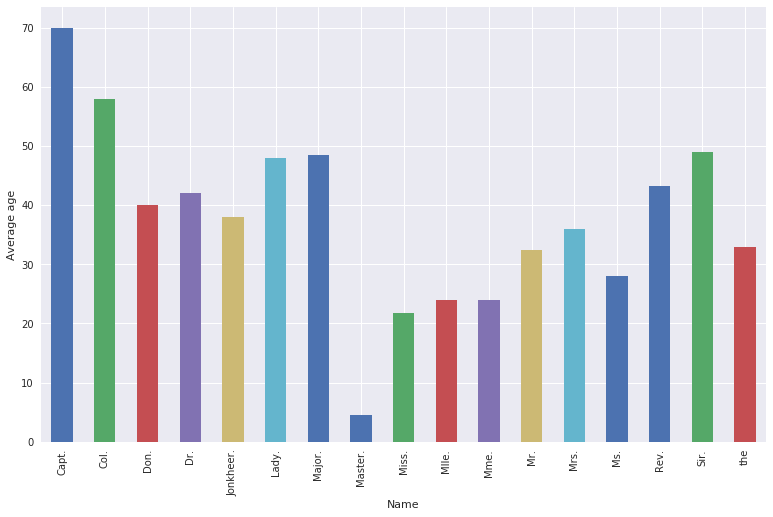

In [7]:
#-------------- Taking care of missing data  -----------------------------

print ('Number of null values in Age:', sum(X.Age.isnull()))
 

# -------- Change Name -> Title ----------------------------
got= dataset.Name.str.split(',').str[1]
X.iloc[:,1]=pd.DataFrame(got).Name.str.split('\s+').str[1]
# ---------------------------------------------------------- 


#------------------ Average Age per title -------------------------------------------------------------
ax = plt.subplot()
ax.set_ylabel('Average age')
X.groupby('Name').mean()['Age'].plot(kind='bar',figsize=(13,8), ax = ax)

title_mean_age=[]
title_mean_age.append(list(set(X.Name)))  #set for unique values of the title, and transform into list
title_mean_age.append(X.groupby('Name').Age.mean())
title_mean_age
#------------------------------------------------------------------------------------------------------


#------------------ Fill the missing Ages ---------------------------
n_traning= dataset.shape[0]   #number of rows
n_titles= len(title_mean_age[1])
for i in range(0, n_traning):
    if np.isnan(X.Age[i])==True:
        for j in range(0, n_titles):
            if X.Name[i] == title_mean_age[0][j]:
                X.Age[i] = title_mean_age[1][j]
#--------------------------------------------------------------------    

X=X.drop(['Name'], axis=1)

In [8]:
for i in range(0, n_traning):
    if X.Age[i] > 18:
        X.Age[i]= 0
    else:
        X.Age[i]= 1

X.head()


,Pclass,Sex,Age,Embarked_C,Embarked_Q
0,3,1,0.0,0,0
1,1,0,0.0,1,0
2,3,0,0.0,0,0
3,1,0,0.0,0,0
4,3,1,0.0,0,0


In [9]:


#-----------------------Logistic Regression---------------------------------------------
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2',random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Logistic Regression:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")



#-----------------------------------K-NN --------------------------------------------------

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("K-NN:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")


#---------------------------------------SVM -------------------------------------------------

# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("SVM:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")


#---------------------------------Naive Bayes-------------------------------------------

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Naive Bayes:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")



#----------------------------Random Forest------------------------------------------

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Random Forest:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std())



Logistic Regression:
 Accuracy: 0.7811678583588695 +/- 0.02594150466779637 

K-NN:
 Accuracy: 0.8103200544773579 +/- 0.031150858002374392 

SVM:
 Accuracy: 0.7855873340143003 +/- 0.026622568318719446 

Naive Bayes:
 Accuracy: 0.7767744864374079 +/- 0.02617976826959799 

Random Forest:
 Accuracy: 0.8137033253887186 +/- 0.031741002619065845
